<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/Fuzzy_logic_based_clinical_decision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
     

glycaemia = ctrl.Antecedent(np.arange(60,130,1) , 'Glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20,1) , 'Sirolimus')
proteinuria = ctrl.Consequent(np.arange(100,3200,10), 'Proteinuria') 

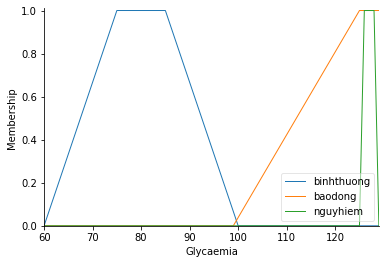

In [ ]:
glycaemia['binhthuong'] = fuzzy.trapmf(glycaemia.universe,[60,75,85,100])
glycaemia['baodong'] = fuzzy.trapmf(glycaemia.universe,[99,125,130,130])
glycaemia['nguyhiem'] = fuzzy.trapmf(glycaemia.universe,[125,126,128,128])
glycaemia.view()

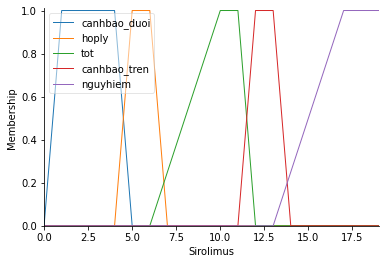

In [ ]:
sirolimus['canhbao_duoi'] = fuzzy.trapmf(sirolimus.universe,[0,1,4,5])
sirolimus['hoply'] = fuzzy.trapmf(sirolimus.universe,[4,5,6,7])
sirolimus['tot'] = fuzzy.trapmf(sirolimus.universe,[6,10,11,12])
sirolimus['canhbao_tren'] = fuzzy.trapmf(sirolimus.universe,[11,12,13,14])
sirolimus['nguyhiem'] = fuzzy.trapmf(sirolimus.universe,[13,17,19,20])
sirolimus.view()

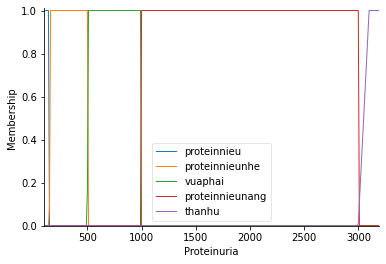

In [ ]:
proteinuria['proteinnieu'] = fuzzy.trapmf(proteinuria.universe,[0,0,140,150])
proteinuria['proteinnieunhe'] = fuzzy.trapmf(proteinuria.universe,[149,160,500,505])
proteinuria['vuaphai'] = fuzzy.trapmf(proteinuria.universe,[499,505,990,1000])
proteinuria['proteinnieunang'] = fuzzy.trapmf(proteinuria.universe,[990,1000,3000,3005])
proteinuria['thanhu'] = fuzzy.trapmf(proteinuria.universe,[2999,3100,3200,3200])
proteinuria.view()

In [ ]:
rule1 = ctrl.Rule(glycaemia['binhthuong']&sirolimus['canhbao_duoi'], proteinuria['proteinnieu'])
rule2 = ctrl.Rule(glycaemia['binhthuong']&sirolimus['canhbao_tren'], proteinuria['vuaphai'])
rule3 = ctrl.Rule(glycaemia['binhthuong']&sirolimus['canhbao_duoi'], proteinuria['proteinnieunhe'])
rule4 = ctrl.Rule(glycaemia['binhthuong']&sirolimus['hoply'], proteinuria['proteinnieunhe'])
rule5 = ctrl.Rule(glycaemia['nguyhiem']&sirolimus['nguyhiem'], proteinuria['thanhu'])
rule6 = ctrl.Rule(glycaemia['baodong']&sirolimus['canhbao_tren'], proteinuria['proteinnieunang'])
rule7 = ctrl.Rule(glycaemia['baodong']&sirolimus['hoply'], proteinuria['vuaphai'])
rule8 = ctrl.Rule(glycaemia['baodong']&sirolimus['tot'], proteinuria['proteinnieunhe'])

decision_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
decision = ctrl.ControlSystemSimulation(decision_ctrl)


329.5336787564767


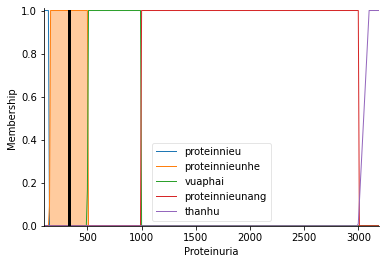

In [ ]:
decision.input['Glycaemia'] = 80
decision.input['Sirolimus'] = 5

decision.compute()
print(decision.output['Proteinuria'])
proteinuria.view(sim = decision)
